In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [27]:
train_data=pd.read_csv('train_data.csv')

In [28]:
test_data=pd.read_csv('test_data_20.csv')


In [30]:
track_feat=pd.read_csv('track_feats.csv')
track_feat.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'is_major', 'organism',
       'speechiness', 'tempo', 'time_signature', 'valence',
       'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2',
       'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5',
       'acoustic_vector_6', 'acoustic_vector_7'],
      dtype='object')

In [31]:
val_data=pd.read_csv('val_data_20.csv')
val_data.shape

(74980, 40)

In [32]:
track_feat.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,3.866097,0.441176,-0.403765,0.075846,0.499848,0.494943,0.461215,-0.208611,0.563252,...,0.571429,0.468440,1.034540,-1.040880,-1.281460,-0.375163,1.442307,0.045940,-0.443245,-0.243705
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1.512969,0.308824,0.314153,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,...,0.571429,0.655369,0.834594,-0.653568,-0.483168,-0.538935,1.247153,0.414248,-0.468285,-0.931875
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,...,0.571429,0.293100,0.846650,0.123691,-2.692681,-0.770798,1.533066,-0.173705,-0.402540,1.181761
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,-0.712162,0.485294,0.558944,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,...,0.571429,0.387131,0.920349,0.335177,-2.631787,-1.033223,1.549514,-0.036511,-0.488062,1.028883
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,-1.629474,0.573529,-0.356946,0.962717,0.130125,0.092335,0.170027,-2.024206,0.005674,...,0.428571,0.030858,2.238796,-3.259609,-2.378984,1.288895,-1.053248,-3.132837,0.946820,-0.623612


In [33]:
track_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316702 entries, 0 to 316701
Data columns (total 30 columns):
track_id                  316702 non-null object
duration                  316702 non-null float64
release_year              316702 non-null float64
us_popularity_estimate    316702 non-null float64
acousticness              316702 non-null float64
beat_strength             316702 non-null float64
bounciness                316702 non-null float64
danceability              316702 non-null float64
dyn_range_mean            316702 non-null float64
energy                    316702 non-null float64
flatness                  316702 non-null float64
instrumentalness          316702 non-null float64
key                       316702 non-null float64
liveness                  316702 non-null float64
loudness                  316702 non-null float64
mechanism                 316702 non-null float64
is_major                  316702 non-null int64
organism                  316702 non-null 

In [34]:
track_feat[[c for c in track_feat.columns if track_feat[c].dtype != 'float64']].head()

,track_id,is_major
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,1
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,1
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,1
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,1


Examin year

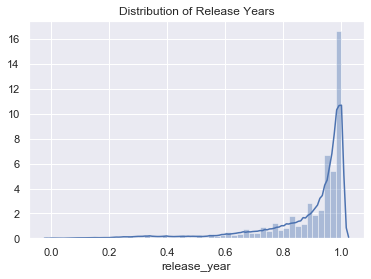

In [37]:
sns.distplot(track_feat.release_year)
plt.title("Distribution of Release Years");

In [20]:
val_data.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.000000,1.0,t_0ecb0e5a-7ef9-41d0-b4a5-04227f26df91,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.052632,1.0,t_cfb7d0c1-6d2e-40d7-b88b-4257418e0e66,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.105263,1.0,t_7f13ebe6-7616-470a-a196-d7054eb16941,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.157895,1.0,t_4e830a5d-4bd2-4d99-a780-2ad244e5e185,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.210526,1.0,t_3976726e-f7bd-4bb1-b554-78f205cc297b,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [23]:
train.isnull().sum()

session_id                                    0
session_position                              0
session_length                                0
track_id_clean                                0
skip_1                                        0
skip_2                                        0
skip_3                                        0
not_skipped                                   0
context_switch                                0
no_pause_before_play                          0
short_pause_before_play                       0
long_pause_before_play                        0
hist_user_behavior_n_seekfwd                  0
hist_user_behavior_n_seekback                 0
hist_user_behavior_is_shuffle                 0
hour_of_day                                   0
premium                                       0
context_type_catalog                          0
context_type_charts                           0
context_type_editorial_playlist               0
context_type_personalized_playlist      

In [ ]:
sns.pairplot(track_feat)